## Привет
Загрузим все необходимые библиотеки

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import seaborn as sns
from wordcloud import WordCloud
import nltk
import numpy as np
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data exploration
Откроем данные, посмотрим размер датасета

In [2]:
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')
train.head()

,id,name,tare
0,0,Котлеты МЛМ из говядины 335г,коробка
1,1,Победа Вкуса конфеты Мишки в лесу 250г(КФ ПОБЕ...,коробка
2,2,"ТВОРОГ (ЮНИМИЛК) ""ПРОСТОКВАШИНО"" ЗЕРНЕНЫЙ 130Г...",стаканчик
3,3,Сыр Плавленый Веселый Молочник с Грибами 190г ...,контейнер
4,4,Жевательный мармелад Маша и медведь буквы 100г,пакет без формы


In [3]:
print (train.shape)
print (test.shape)

(40648, 3)
(19795, 2)


40к строк, посмотрим количество классов упаковок и распределение по ним

In [4]:
class_names = train.tare.unique()
print('Количество продуктов с тарой:')
print('='*90)
for name in class_names:
    print(name,train[train['tare']==name].count()[0])

Количество продуктов с тарой:
коробка 4196
стаканчик 2070
контейнер 884
пакет без формы 9028
бутылка 7474
лоток 628
вакуумная упаковка 1071
без упаковки 322
туба 589
обертка 3217
пакет прямоугольный 3501
усадочная упаковка 993
банка металлическая 1837
пачка 691
гофрокороб 419
упаковка с газовым наполнением 289
тортница 324
банка неметаллическая 2238
ведро 253
колбасная оболочка 396
ячеистая упаковка 228


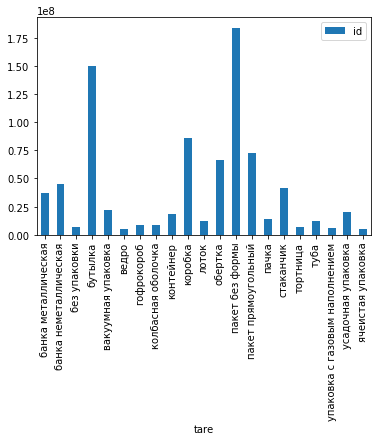

In [5]:
rcParams['figure.figsize'] = 6, 4
train.groupby('tare').sum().plot(kind='bar', rot=90);

Самые многочисленные - пакет без формы, бутылка и коробка, для остальных записей меньше.
Посмотрим самые популярные слова для всех наименований:

In [8]:
rcParams['figure.figsize'] = 10, 8

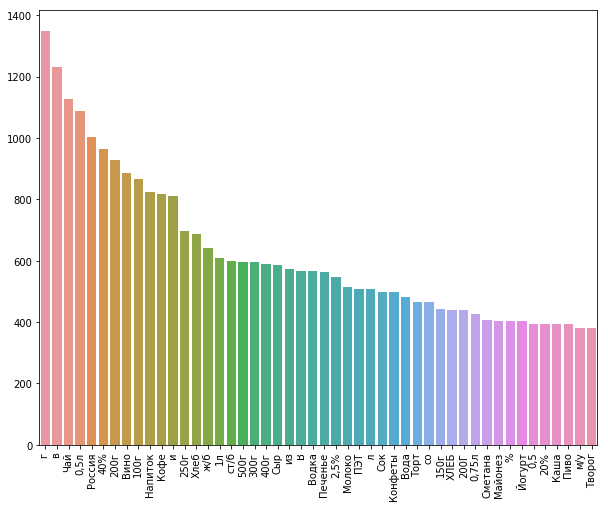

In [9]:
all_words = train['name'].str.split(expand=True).unstack().value_counts()
g = sns.barplot(x = all_words.index.values[2:50],
            y = all_words.values[2:50]);

for item in g.get_xticklabels():
    item.set_rotation(90)

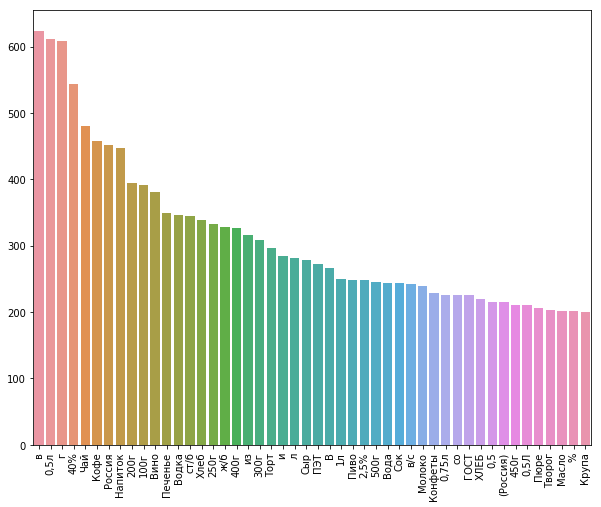

In [7]:
all_words = test['name'].str.split(expand=True).unstack().value_counts()
g = sns.barplot(x = all_words.index.values[2:50],
            y = all_words.values[2:50]);
rcParams['figure.figsize'] = 10, 8
for item in g.get_xticklabels():
    item.set_rotation(90)

Как можно увидеть, самыми популярными оказались __г__ и __в__, после этого идут уже ожидаемые __чай__, __0.5л__, __Россия__ и т.д.
Можно посмотреть как изменится список самых популярных слов для определенных категорий, для примера возьмем самые многочисленные категории _пакет без формы_ и _бутылка_

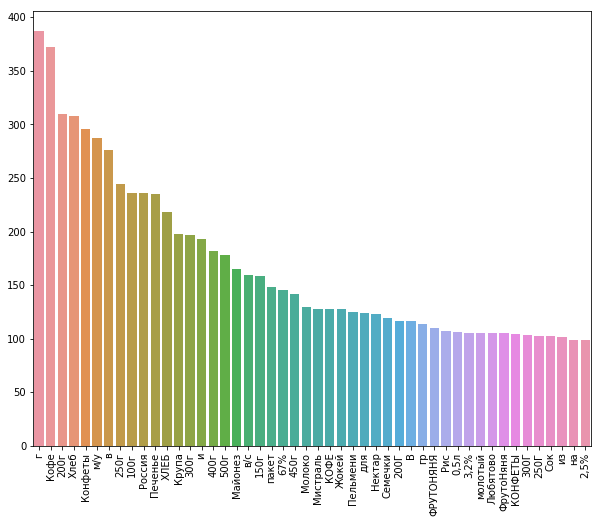

In [8]:
all_words = train[train['tare']=='пакет без формы']['name'].str.split(expand=True).unstack().value_counts()
g = sns.barplot(x = all_words.index.values[2:50],
            y = all_words.values[2:50]);
rcParams['figure.figsize'] = 10, 8
for item in g.get_xticklabels():
    item.set_rotation(90)

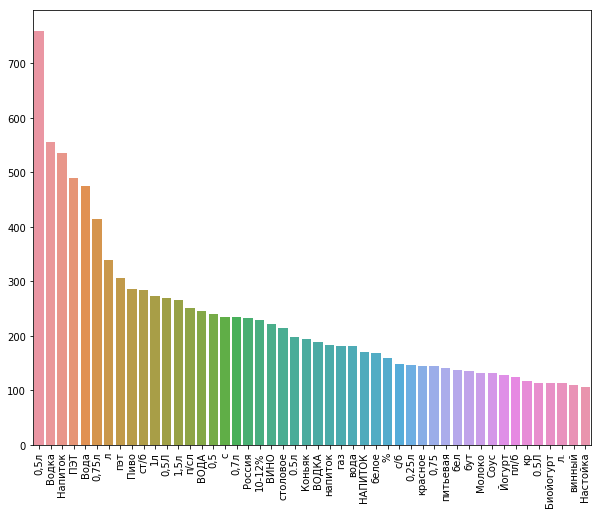

In [9]:
all_words = train[train['tare']=='бутылка']['name'].str.split(expand=True).unstack().value_counts()
g = sns.barplot(x = all_words.index.values[2:50],
            y = all_words.values[2:50]);
rcParams['figure.figsize'] = 10, 8
for item in g.get_xticklabels():
    item.set_rotation(90)

Можно увидеть, что для пакетов популярными оказались вес - __г__, __200г__ и наименования товаров - кофе, хлеб, конфеты.
Для бутылок также популярными словами оказался литраж бутылок - __0,5л__, __0,75л__, и вид товаров: __водка__, __напиток__, __вода__.

Можно предположить, что для построения модели наиболее эффективной окажется tf-idf векторизация, причем надо анализировать как слова (виды товаров внесут большой вклад, очевидно, что для разной тары они разные), так и n-граммы (это весы, литры, проценты содержания алкоголя и жиров и т.д.)

Также можно оценить распределение длин описаний товаров:

In [12]:
rcParams['figure.figsize'] = 8, 6

42.35396575477268 14.329931672392242 184


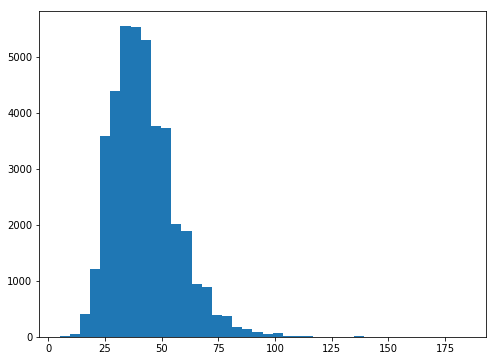

In [13]:
lens = train.name.str.len()
print (lens.mean(), lens.std(), lens.max())
lens.hist(bins=40,grid=False);

42.17863096741601 14.238230518233376 156


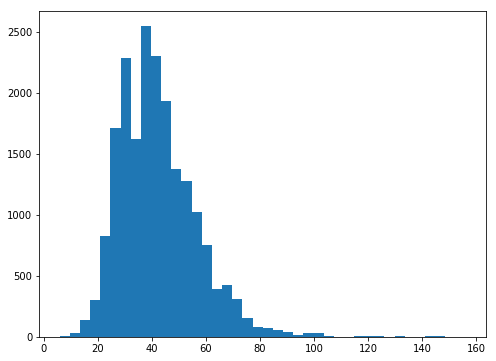

In [14]:
lens = test.name.str.len()
print (lens.mean(), lens.std(), lens.max())
lens.hist(bins=40,grid=False);

Можно сделать инфографику _Облако слов_ для описаний товаров, чем больше слово на ней, тем чаще оно встречается:

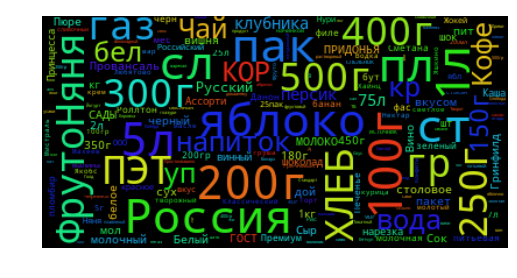

In [3]:
all_words = train['name'].str.cat()
wordcloud = WordCloud(background_color="black", max_words=2000,
            max_font_size=40,
            stopwords=nltk.corpus.stopwords.words('russian')).generate(all_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

Также сделаем для категорий товаров: _бутылка_ и _пакет без формы_

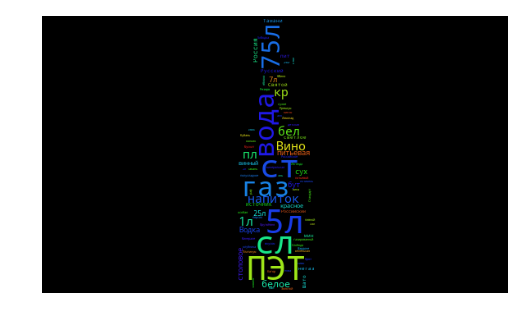

In [5]:
vine_mask = np.array(Image.open("vine.jpg"))
all_words = train[train['tare']=='бутылка']['name'].str.cat()
wordcloud = WordCloud(background_color="black", max_words=2000,
            max_font_size=40,
            stopwords=nltk.corpus.stopwords.words('russian'),
            mask=vine_mask).generate(all_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

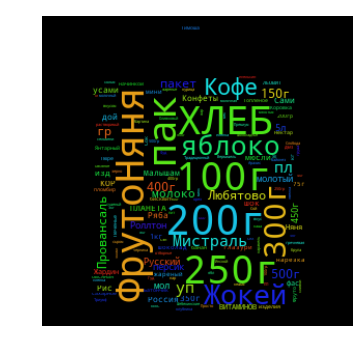

In [6]:
paket_mask = np.array(Image.open("paket.jpg"))
all_words = train[train['tare']=='пакет без формы']['name'].str.cat()
wordcloud = WordCloud(background_color="black", max_words=2000,
            max_font_size=40,
            stopwords=nltk.corpus.stopwords.words('russian'),
            mask=paket_mask).generate(all_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

Перед построением моделей нужно сделать лемматизацию: обработку текста, чтобы все слова были приведены к одной формы
Можно воспользоваться стеммером Портера из библиотеки обработки естественного языка __nltk__, но для русского языка лучше работает обработчик Яндекса Mystem.

Есть пакет для питона __pymystem3__, которым можно обработать слова, но он работает очень медленно, поэтому быстрее воспользоваться программой от Яндекс - MyStem (https://tech.yandex.ru/mystem/). Для простоты обработки в папке по ссылке https://yadi.sk/d/jjxXWW4S3SboMW имеется файл пакетной обработки - lemmatization.cmd. Там же есть маски пакета и вина для облака слов выше.
Полученные файлы были также обработаны в блокноте - удалены символы "__{}?__".

In [16]:
%%time
from pymystem3 import Mystem
m = Mystem()
print ('Без обработки:')
print (train['name'][40503])
lemmas = m.lemmatize(train['name'][40503])
stroka = ''.join(lemmas)
print ('После обработки:')
print (stroka)

Без обработки:
Штрудель Австрийский с яблоком и корицей кор. 100г
После обработки:
штрудель австрийский с яблоко и корица кор. 100г

Wall time: 6.56 s


Загрузим полученные после обработки текста файлы:

In [9]:
#сохраняем текст без целевой колонки (её лемматизировать нельзя) для последующей обработки
train.drop(labels='tare',axis=1).to_csv("train_text.csv",index=False)
#загружаем полученные тексты
train_lemm = pd.read_csv('train_lemm.csv')
test_lemm = pd.read_csv('test_lemm.csv')
train_lemm.head()

,id,name
0,0,котлета МЛМ из говядина 335г
1,1,победа вкус конфета мишка в лес 250г(КФ победа...
2,2,"творог (юнимилк) ""простоквашино"" зерненый 130Г..."
3,3,сыр плавленый веселый молочник с гриб 190г ванна
4,4,жевательный мармелад маша и медведь буква 100г


## Обучение

Полученный текст выглядит вполне прилично, можно начинать обучение моделей.

В качестве baseline воспользуемся функцией text_classifier, написанной для более удобного пользования пайплайном и посмотрим результаты нескольких моделей на кросс-валидации. 
Модели, которые проверим: 
- логистическая регрессия
- метод опорных векторов
- градиентный бустинг на решающих деревьях (реализация lightgbm от Microsoft)
- наивный байесовский классификатор.

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from scipy.sparse import hstack
from scipy.special import logit, expit
from sklearn.pipeline import FeatureUnion
from lightgbm import LGBMClassifier

In [12]:
def text_classifier(vectorizer, transformer, classifier):
    return Pipeline(
            [("vectorizer", vectorizer),
            ("transformer", transformer),
            ("classifier", classifier)]
        )

In [13]:
%%time
for clf in [LogisticRegression, LinearSVC, SGDClassifier, LGBMClassifier,MultinomialNB]:
    print (clf)
    print (cross_val_score(text_classifier(CountVectorizer(), TfidfTransformer(), clf()), train_lemm['name'], 
                          train['tare']).mean())
    print ('='*90)

<class 'sklearn.linear_model.logistic.LogisticRegression'>
0.786558604956
<class 'sklearn.svm.classes.LinearSVC'>
0.852883345105
<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
0.808527438088
<class 'lightgbm.sklearn.LGBMClassifier'>
0.751377024816
<class 'sklearn.naive_bayes.MultinomialNB'>
0.688594951234
Wall time: 4min 30s


Лучший результат показал метод опорных векторов с качеством на кросс-валидации __0.85__. Неплохо, можно принять это значение как базовое, которое нам нужно улучшить.
Попробуем увеличить количество данных для обучения - сделаем векторизацию TF-IDF на обучающем датасете для слов и для n-грамм, после этого объединим и будем тренироваться на объединенной матрице векторов.

In [14]:
train_text = train_lemm['name']
test_text = test_lemm['name']
all_text = pd.concat([train_text, test_text])
stop_words_nltk= nltk.corpus.stopwords.words('russian')
#TF-IDF векторайзер для слов
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    stop_words=stop_words_nltk,
    max_features=15000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_lemm['name'])
test_word_features = word_vectorizer.transform(test_lemm['name'])
#TF-IDF векторайзер для N-грамм
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 5),
    max_features=20000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_text, train['tare'], test_size=0.33, random_state=42)

X_train_wfeatures = word_vectorizer.transform(X_train)
X_test_wfeatures = word_vectorizer.transform(X_test)

X_train_cfeatures = char_vectorizer.transform(X_train)
X_test_cfeatures = char_vectorizer.transform(X_test)

Xtrain_features = hstack([X_train_cfeatures, X_train_wfeatures])
Xtest_features = hstack([X_test_cfeatures, X_test_wfeatures])

In [25]:
clf = LogisticRegressionCV(Cs=[1,3,5], random_state=21, cv=5, n_jobs=-1)
clf.fit(Xtrain_features, y_train)
accuracy_score(clf.predict(Xtest_features),y_test)

0.86760101386610999

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred=clf.predict(Xtest_features), labels=class_names)
cm

array([[1144,    1,   24,  104,   12,    2,    0,    0,    0,   33,   12,
           4,    1,    0,    3,    0,    8,    4,    0,    0,    0],
       [   2,  634,    1,   23,    4,    2,    0,    0,    0,   13,    8,
           0,    1,    0,    0,    0,    0,    5,    1,    0,    0],
       [  30,    5,  196,   20,    0,    1,    3,    0,    0,   13,    0,
           1,    2,    1,    0,    0,    5,    6,    0,    2,    0],
       [  55,   13,    3, 2707,   17,    5,   10,    2,    6,   85,   65,
          23,    4,    5,    5,    0,    1,    7,    1,    0,    0],
       [   6,    3,    0,   12, 2451,    0,    0,    0,    4,    2,   26,
           1,    1,    0,    0,    0,    0,    3,    0,    0,    0],
       [   6,    1,    3,   21,    1,  142,    4,    0,    0,    3,    1,
           1,    4,    0,    1,    1,    0,    3,    0,    0,    0],
       [   7,    0,    1,   18,    0,    3,  276,    0,    0,    5,    2,
           0,    1,    0,    0,    1,    0,   10,    1,    6,    0],

In [29]:
test_classes_counts = class_names.value_counts()
test_classes_names = np.array(test_classes_counts.index)
total_classes = len(test_classes_counts)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [27]:
for true_class_id in range(class_names):
    true_class_name = test_classes_names[true_class_id]
    true_class_count = test_classes_counts[true_class_name]
    
    print('Для настоящей упаковки "{0}" ({1} тестовых экземпляров) были предложены:'.format(true_class_name, true_class_count))
    for pred_class_id in range(total_classes):
        percent = cm[true_class_id, pred_class_id] / true_class_count * 100
        if percent >= 5:
            pred_class_name = test_classes_names[pred_class_id]
            print('\t"{0}" в {1:.2f} % случаев ({2} раз)'.format(pred_class_name, percent, cm[true_class_id, pred_class_id]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [15]:
%%time
clf = LinearSVC()
print((cross_val_score(clf, train_features, train['tare']).mean()))

0.873991471009
Wall time: 41.8 s


Качество увеличилось, но не сильно, попробуем обучить логистическую регрессию.

In [16]:
%%time
clf = LogisticRegressionCV(Cs=[1,3,5], random_state=21, cv=5, n_jobs=-1)
clf.fit(train_features, train['tare'])

Wall time: 4min 46s


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train['tare'], test_size=0.33, random_state=42)

In [22]:
clf = LogisticRegressionCV(Cs=[1,3,5], random_state=21, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1, 3, 5], class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=21,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [23]:
accuracy_score(clf.predict(y_train),y_test)

ValueError: could not convert string to float: 'тортница'

In [21]:
for i in range(50):
    print (test_lemm['name'][i],'===>',clf.predict(test_features)[i])

масло "чишминский" халяль рафинировать 1 л ===> бутылка
печение"танец бабочка"вес глобус ===> гофрокороб
крупа метака пшенич 5*100 ===> пакет без формы
конфета минни-ух 200г сладуница ===> пакет без формы
хейлис королевский слон чай черный байховый 1,8г 25п ===> пачка
масло ТС оливковый раф пл/б 0,5л ===> бутылка
(кор) вафля мой обожание вареный сгущенка 150Г ===> обертка
кофе CARTE NOIRE зерно 230г м/у ===> пачка
хлеб пеклевать смеш. валка 0,6кг (оао камышинский х/к) ===> обертка
пиво волковский пивоварня светлячок 0,45л светлый алк.5,0% ст/б ===> бутылка
водка медофф люкс 0,7 40% (юпитер инкорпорейтед ооо) россия ===> бутылка
напиток "бубимэкс" газ. лимонад оригинальный ст/б 0.5 л ===> бутылка
семя подсолнечник обжаривать "кубанский семечко" 1/300 ===> пакет без формы
рыбка лещ немо сол-суша соломка 80Г в у ===> пакет без формы
конфуций зел Цв оол 50г ст ===> банка неметаллическая
лапша анак куриный бульон 60г стакан ===> стаканчик
нескаф клас.с/б 95г /457 1*24 ===> банка неметалличе

Получилось довольно неплохо, точность на кросс-валидации __0.969__ (правда в документации в sklearn пишется, что это не совсем точно при обучении на мультиклассовой классификации из-за особенностей обучения).

Для дальнейшего улучшения можно попробовать заняться feature engineering-ом добавить признаки длин текстов, счетчиков слов и т.д., и обучать вместе с ними, но у меня на ноутбуке это почему-то значительно увеличило время обучения, а результат уже получился хороший, поэтому я не стал обучать.

## Feature engeenering
Примеры признаков, которые можно было бы попробовать добавить:

In [28]:
import re
import string
train_lemm['count_sent']=train["name"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Количество слов в каждом описании:
train_lemm['count_word']=train["name"].apply(lambda x: len(str(x).split()))
#Количество уникальных слов
train_lemm['count_unique_word']=train["name"].apply(lambda x: len(set(str(x).split())))
#Количество букв
train_lemm['count_letters']=train["name"].apply(lambda x: len(str(x)))
#Количество знаков препинания
train_lemm["count_punctuations"] =train["name"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#Количество слов, состоящих из заглавных букв
train_lemm["count_words_upper"] = train["name"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#Количество слов начинающихся с заглавной буквы
train_lemm["count_words_title"] = train["name"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Количество слов, входящих в корпус стоп-слов 
train_lemm["count_stopwords"] = train["name"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words_nltk]))
#Средняя длина слов
train_lemm["mean_word_len"] = train["name"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


train_lemm['word_unique_percent']=train_lemm['count_unique_word']*100/train_lemm['count_word']

train_lemm['punct_percent']=train_lemm['count_punctuations']*100/train_lemm['count_word']

In [29]:
train_lemm.describe()

,id,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
count,40648.000000,40648.0,40648.000000,40648.000000,40648.000000,40648.000000,40648.000000,40648.000000,40648.000000,40648.000000,40648.000000,40648.000000
mean,20323.500000,1.0,6.434019,6.400684,42.353966,2.149380,1.840386,2.014244,0.298440,5.996648,99.686579,35.287758
std,11734.211208,0.0,2.181502,2.121109,14.329932,2.015836,2.535619,1.262707,0.585845,2.511462,2.610437,39.106838
min,0.000000,1.0,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,28.571429,0.000000
25%,10161.750000,1.0,5.000000,5.000000,32.000000,1.000000,0.000000,1.000000,0.000000,5.000000,100.000000,12.500000
50%,20323.500000,1.0,6.000000,6.000000,40.000000,2.000000,1.000000,2.000000,0.000000,5.666667,100.000000,28.571429
75%,30485.250000,1.0,8.000000,8.000000,50.000000,3.000000,3.000000,3.000000,0.000000,6.500000,100.000000,50.000000
max,40647.000000,1.0,30.000000,22.000000,184.000000,20.000000,16.000000,18.000000,8.000000,69.000000,100.000000,1300.000000


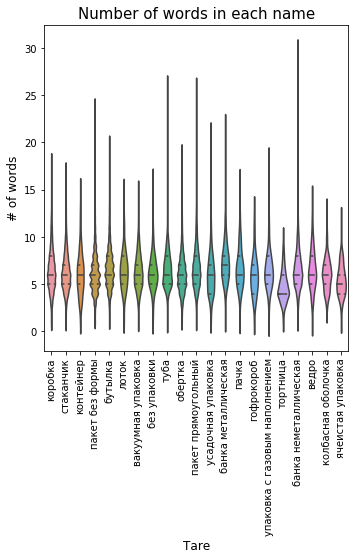

In [32]:
train_lemm['count_sent'].loc[train_lemm['count_sent']>10] = 10 
plt.figure(figsize=(12,6))
# words
train_lemm['count_word'].loc[train_lemm['count_word']>200] = 200
plt.subplot(122)
g = sns.violinplot(y=train_lemm['count_word'],x=train['tare'],split=True,inner="quart")
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.xlabel('Tare', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each name", fontsize=15)
plt.show()

Но,так как, этими признаками я не пользовался, поэтому можно сделать файл с предсказаниями для тестового датасета и закончить =)

In [33]:
test['tare'] = clf.predict(test_features)

In [41]:
test.drop(labels='name',axis=1).to_csv('prediction.csv',index=False)

In [42]:
pred = pd.read_csv('prediction.csv')
pred.head()

,id,tare
0,40648,бутылка
1,40649,гофрокороб
2,40650,пакет без формы
3,40651,пакет без формы
4,40652,пачка


Файл получился правильный, всё ок, спасибо за внимание =)